In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json

# Import API key
from Config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
file_one = "winemag-data-130k-v2.csv"

In [13]:
df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [14]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin OâKeefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [15]:
df = df[pd.notnull(df['price'])]
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [16]:
df.count()

Unnamed: 0               120975
country                  120916
description              120975
designation               86196
points                   120975
price                    120975
province                 120916
region_1                 101400
region_2                  50292
taster_name               96479
taster_twitter_handle     91559
title                    120975
variety                  120974
winery                   120975
dtype: int64

In [64]:
sort_by_price_desc = df.sort_values('price',ascending=False)
sort_by_price_desc.count()

Unnamed: 0               120975
country                  120916
description              120975
designation               86196
points                   120975
price                    120975
province                 120916
region_1                 101400
region_2                  50292
taster_name               96479
taster_twitter_handle     91559
title                    120975
variety                  120974
winery                   120975
dtype: int64

In [65]:
sort_by_price_desc = sort_by_price_desc[sort_by_price_desc.region_1.str.contains("©") == False]
sort_by_price_desc.count()


Unnamed: 0               98762
country                  98762
description              98762
designation              68891
points                   98762
price                    98762
province                 98762
region_1                 98762
region_2                 50292
taster_name              74652
taster_twitter_handle    71677
title                    98762
variety                  98762
winery                   98762
dtype: int64

In [66]:
sort_by_price_desc = sort_by_price_desc.iloc[0:2000] # first twenty five rows of dataframe
sort_by_price_desc.count()

Unnamed: 0               2000
country                  2000
description              2000
designation              1576
points                   2000
price                    2000
province                 2000
region_1                 2000
region_2                  725
taster_name              1531
taster_twitter_handle    1529
title                    2000
variety                  2000
winery                   2000
dtype: int64

In [67]:
top_city_list = sort_by_price_desc["region_1"].unique()
top_city_list

array(['Pomerol', 'Arroyo Seco', 'Margaux', 'Pauillac',
       'Saint-Ã\x89milion', 'Musigny', 'Brunello di Montalcino',
       'Montrachet', 'South Australia', 'Eden Valley', 'Sauternes',
       'Champagne', 'Menetou-Salon', 'Priorat', 'Paso Robles',
       'Chevalier-Montrachet', 'Grands-Echezeaux', 'Napa Valley',
       'Toscana', 'Chambertin', 'Ribera del Duero', 'Barolo',
       'Chambertin Clos de BÃ¨ze', 'BÃ¢tard-Montrachet',
       'Amarone della Valpolicella', 'Rutherford', 'ChÃ¢teauneuf-du-Pape',
       'Langhe', 'Bonnes-Mares', 'Bienvenues BÃ¢tard-Montrachet',
       'Mazoyeres-Chambertin', 'Sonoma County', 'Barbaresco', 'Cahors',
       'Stags Leap District', 'Clos de Vougeot', 'CÃ´te RÃ´tie',
       'Criots-BÃ¢tard-Montrachet', 'Umbria', 'Nuits-St.-Georges',
       'Saint-EstÃ¨phe', 'Saint-Julien', 'Charmes-Chambertin',
       'Chambolle-Musigny', 'Mazis-Chambertin', 'Rutherglen', 'Rioja',
       'Amarone della Valpolicella Classico', 'Bordeaux', 'Rivesaltes',
       'Clar

In [68]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response_json = requests.get(query_url + "London").json()
print(json.dumps(response_json, indent=4, sort_keys=True))
response_json['name']
rtime = datetime.datetime.fromtimestamp(response_json['dt']).strftime('%m-%d-%Y')

{
    "base": "stations",
    "clouds": {
        "all": 12
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1531597800,
    "id": 2643743,
    "main": {
        "humidity": 47,
        "pressure": 1017,
        "temp": 22.74,
        "temp_max": 25,
        "temp_min": 19
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 5091,
        "message": 0.0051,
        "sunrise": 1531540836,
        "sunset": 1531599098,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 3.1
    }
}


In [70]:
lat = []
temp = []
name = []
country = []
humidity = []
wind = []
cloud = []

# Loop through the list of cities and perform a request for data on each
for city2 in top_city_list:
    response = requests.get(query_url + city2, False).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        name.append(response['name'])
        country.append(response['sys']['country'])
    except KeyError:
        continue
    

In [71]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "region_1": name,
    "country": country,
    "lat": lat,
    "temp": temp,
    "clouds": cloud,
    "wind": wind,
    "humidity": humidity
   
}
weather_data = pd.DataFrame(weather_dict)
weather_data['temp'] = (9 * weather_data['temp'] + (32 * 5))/5
weather_data

,clouds,country,humidity,lat,region_1,temp,wind
0,0,FR,54,44.93,Pomerol,78.800,3.60
1,0,AR,44,-33.15,Arroyo Seco,77.000,5.10
2,0,FR,54,45.04,Margaux,78.800,3.60
3,0,FR,54,45.20,Pauillac,80.600,3.60
4,0,FR,56,47.16,Musigny,71.600,0.50
5,1,US,48,45.33,Eden Valley,86.000,2.85
6,0,FR,54,44.53,Sauternes,80.600,3.60
7,12,FR,43,49.56,Champagne,73.112,2.90
8,0,FR,53,47.23,Menetou-Salon,75.200,1.50
9,1,US,28,35.63,Paso Robles,93.200,2.10


In [72]:
merge_wine_weather = pd.merge(sort_by_price_desc, weather_data, on = "region_1", how = "left" )
merge_wine_weather.head()

,Unnamed: 0,country_x,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clouds,country_y,humidity,lat,temp,wind
0,15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,ChÃ¢teau PÃ©trus 2014 Pomerol,Bordeaux-style Red Blend,ChÃ¢teau PÃ©trus,0.0,FR,54.0,44.93,78.8,3.6
1,120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair,0.0,AR,44.0,-33.15,77.0,5.1
2,65352,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,ChÃ¢teau PÃ©trus 2011 Pomerol,Bordeaux-style Red Blend,ChÃ¢teau PÃ©trus,0.0,FR,54.0,44.93,78.8,3.6
3,1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,ChÃ¢teau Margaux 2009 Margaux,Bordeaux-style Red Blend,ChÃ¢teau Margaux,0.0,FR,54.0,45.04,78.8,3.6
4,111753,France,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,ChÃ¢teau Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,ChÃ¢teau Lafite Rothschild,0.0,FR,54.0,45.20,80.6,3.6


In [73]:
df_plot = merge_wine_weather[pd.notnull(merge_wine_weather['temp'])]
df_plot.count()

Unnamed: 0               914
country_x                914
description              914
designation              795
points                   914
price                    914
province                 914
region_1                 914
region_2                 218
taster_name              759
taster_twitter_handle    759
title                    914
variety                  914
winery                   914
clouds                   914
country_y                914
humidity                 914
lat                      914
temp                     914
wind                     914
dtype: int64

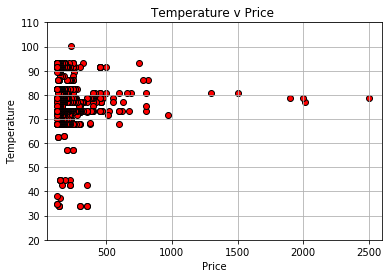

In [95]:
plt.figure(0)
plt.xlim(50,2600)
plt.ylim(20,110)
plt.title("Temperature v Price ")
plt.xlabel("Price")
plt.ylabel("Temperature")
plt.scatter(df_plot['price'],df_plot['temp'],  marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.savefig("Price_Temp.png")


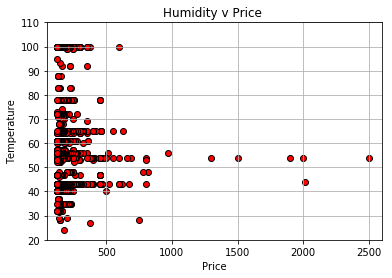

In [96]:
plt.figure(1)
plt.xlim(50,2600)
plt.ylim(20,110)
plt.title("Humidity v Price ")
plt.xlabel("Price")
plt.ylabel("Temperature")
plt.scatter(df_plot['price'],df_plot['humidity'],  marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.savefig("Price_humidity.png")

In [80]:
sort_by_price_asc = df.sort_values('price',ascending= True)
sort_by_price_asc.count()

Unnamed: 0               120975
country                  120916
description              120975
designation               86196
points                   120975
price                    120975
province                 120916
region_1                 101400
region_2                  50292
taster_name               96479
taster_twitter_handle     91559
title                    120975
variety                  120974
winery                   120975
dtype: int64

In [81]:
sort_by_price_asc = sort_by_price_asc[sort_by_price_asc.region_1.str.contains("©") == False]
sort_by_price_asc.count()

Unnamed: 0               98762
country                  98762
description              98762
designation              68891
points                   98762
price                    98762
province                 98762
region_1                 98762
region_2                 50292
taster_name              74652
taster_twitter_handle    71677
title                    98762
variety                  98762
winery                   98762
dtype: int64

In [82]:
sort_by_price_asc = sort_by_price_asc.iloc[0:2000] # first twenty five rows of dataframe
sort_by_price_asc.count()

Unnamed: 0               2000
country                  2000
description              2000
designation               951
points                   2000
price                    2000
province                 2000
region_1                 2000
region_2                  728
taster_name              1426
taster_twitter_handle    1419
title                    2000
variety                  2000
winery                   2000
dtype: int64

In [83]:
bottom_city_list = sort_by_price_asc["region_1"].unique()
bottom_city_list

array(['Clarksburg', 'Yecla', 'California',
       'Vino de la Tierra de Castilla', 'Mendoza', 'Utiel-Requena',
       "Vin de Pays d'Oc", 'Vin de France', 'CariÃ±ena',
       'South Eastern Australia', 'Prosecco', 'OltrepÃ² Pavese',
       'Willamette Valley', 'Sicilia', 'Puglia', 'La Mancha',
       'Washington', 'Catalunya', 'Catalonia', 'Bordeaux Blanc', 'Idaho',
       'Emilia-Romagna', 'Calatayud', 'Columbia Valley (WA)', 'Valencia',
       'Campo de Borja', 'Somontano', 'Chianti', 'PenedÃ¨s', 'Rueda',
       'Irpinia', 'Toscana', 'Veneto', 'Emilia', 'Rioja', 'Minervois',
       'Gers', 'Lodi', 'Yakima Valley', 'Monterey County',
       "Montepulciano d'Abruzzo", 'Missouri', 'Navarra',
       'Grave del Friuli', 'North Fork of Long Island', "Moscato d'Asti",
       'Trentino', 'Ribera del Duero', 'Mendocino', 'Cava',
       'Tierra de Castilla', 'South Australia', "Vin de Pays de L'Aude",
       'Vernaccia di San Gimignano', 'La Rioja', "Lambrusco dell'Emilia",
       'Alicante',

In [85]:
lat2 = []
temp2 = []
name2 = []
country2 = []
humidity2 = []
wind2 = []
cloud2 = []

# Loop through the list of cities and perform a request for data on each
for city3 in bottom_city_list:
    response2 = requests.get(query_url + city3, False).json()
    try:
        lat2.append(response2['coord']['lat'])
        temp2.append(response2['main']['temp_max'])
        humidity2.append(response2['main']['humidity'])
        wind2.append(response2['wind']['speed'])
        cloud2.append(response2['clouds']['all'])
        name2.append(response2['name'])
        country2.append(response2['sys']['country'])
    except KeyError:
        continue
    

In [86]:
# create a data frame from cities, lat, and temp
weather_dict2 = {
    "region_1": name2,
    "country": country2,
    "lat": lat2,
    "temp": temp2,
    "clouds": cloud2,
    "wind": wind2,
    "humidity": humidity2
   
}
weather_data2 = pd.DataFrame(weather_dict2)
weather_data2['temp'] = (9 * weather_data2['temp'] + (32 * 5))/5
weather_data2

,clouds,country,humidity,lat,region_1,temp,wind
0,20,US,52,39.28,Clarksburg,91.400,3.10
1,0,ES,83,38.61,Yecla,78.800,0.50
2,40,MX,23,24.05,California,82.400,6.70
3,0,AR,37,-32.89,Mendoza,68.000,2.10
4,40,IT,64,45.74,Puglia,73.400,2.10
5,0,PE,45,-14.68,La Mancha,66.902,1.30
6,20,US,33,38.90,Washington DC.,91.400,5.10
7,0,FR,69,42.66,Catalunya,75.200,2.10
8,1,US,94,35.09,Idaho,89.600,0.90
9,0,ES,45,41.35,Calatayud,84.200,3.10


In [87]:
merge_wine_weather2 = pd.merge(sort_by_price_asc, weather_data2, on = "region_1", how = "left" )
merge_wine_weather2.head()

,Unnamed: 0,country_x,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clouds,country_y,humidity,lat,temp,wind
0,20484,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,20.0,US,52.0,39.28,91.4,3.1
1,112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,0.0,ES,83.0,38.61,78.8,0.5
2,59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,40.0,MX,23.0,24.05,82.4,6.7
3,31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Chardonnay (California),Chardonnay,Bandit,40.0,MX,23.0,24.05,82.4,6.7
4,61768,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal,0.0,ES,83.0,38.61,78.8,0.5


In [88]:
df_plot2 = merge_wine_weather2[pd.notnull(merge_wine_weather2['temp'])]
df_plot2.count()

Unnamed: 0               1090
country_x                1090
description              1090
designation               494
points                   1090
price                    1090
province                 1090
region_1                 1090
region_2                  509
taster_name               690
taster_twitter_handle     685
title                    1090
variety                  1090
winery                   1090
clouds                   1090
country_y                1090
humidity                 1090
lat                      1090
temp                     1090
wind                     1090
dtype: int64

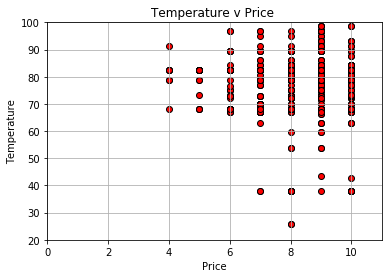

In [93]:
plt.figure(2)
plt.xlim(0,11)
plt.ylim(20,100)
plt.title("Temperature v Price ")
plt.xlabel("Price")
plt.ylabel("Temperature")
plt.scatter(df_plot2['price'],df_plot2['temp'],  marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.savefig("Low_Price_Temp.png")

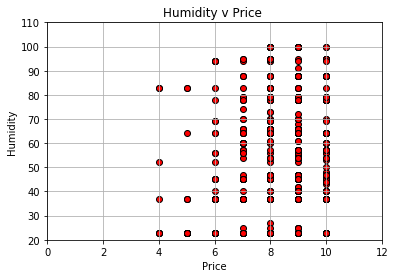

In [98]:
plt.figure(3)
plt.xlim(0,12)
plt.ylim(20,110)
plt.title("Humidity v Price ")
plt.xlabel("Price")
plt.ylabel("Humidity")
plt.scatter(df_plot2['price'],df_plot2['humidity'],  marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.savefig("Low_Price_humidity.png")